In [42]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np
from glob import glob

In [43]:
#函数加载
def load_dataset(path):
    data=load_files(path)
    dog_files=np.array(data['filenames'])
    dog_targets=np_utils.to_categorical(np.array(data['target']),133)
    return dog_files,dog_targets

In [44]:
#加载数据集
train_files,train_targets=load_dataset(r'C:\Users\wlwy\Documents\four_task\dogImages\train')
valid_files,valid_targets=load_dataset(r'C:\Users\wlwy\Documents\four_task\dogImages\valid')
test_files,test_targets=load_dataset(r'C:\Users\wlwy\Documents\four_task\dogImages\test')

In [45]:
#加载狗品种列表
dog_names=[item[72:-1] for item in sorted(glob("C:/Users/wlwy/Documents/four_task/dogImages/train/*/"))]

In [46]:
print('dog_names=',len(dog_names))
print('train_files=',len(train_files))
print('valid_files=',len(valid_files))
print('test_files=',len(test_files))
print('all number=',len(train_files)+len(valid_files)+len(test_files))

dog_names= 133
train_files= 6680
valid_files= 835
test_files= 836
all number= 8351


In [47]:
sorted(glob("C:/Users/wlwy/Documents/four_task/dogImages/train/*/"))#进行排序

['C:/Users/wlwy/Documents/four_task/dogImages/train\\001.Affenpinscher\\',
 'C:/Users/wlwy/Documents/four_task/dogImages/train\\002.Afghan_hound\\',
 'C:/Users/wlwy/Documents/four_task/dogImages/train\\003.Airedale_terrier\\',
 'C:/Users/wlwy/Documents/four_task/dogImages/train\\004.Akita\\',
 'C:/Users/wlwy/Documents/four_task/dogImages/train\\005.Alaskan_malamute\\',
 'C:/Users/wlwy/Documents/four_task/dogImages/train\\006.American_eskimo_dog\\',
 'C:/Users/wlwy/Documents/four_task/dogImages/train\\007.American_foxhound\\',
 'C:/Users/wlwy/Documents/four_task/dogImages/train\\008.American_staffordshire_terrier\\',
 'C:/Users/wlwy/Documents/four_task/dogImages/train\\009.American_water_spaniel\\',
 'C:/Users/wlwy/Documents/four_task/dogImages/train\\010.Anatolian_shepherd_dog\\',
 'C:/Users/wlwy/Documents/four_task/dogImages/train\\011.Australian_cattle_dog\\',
 'C:/Users/wlwy/Documents/four_task/dogImages/train\\012.Australian_shepherd\\',
 'C:/Users/wlwy/Documents/four_task/dogImage

In [48]:
train_files[:-1]#保存所有图片的目录

array(['C:\\Users\\wlwy\\Documents\\four_task\\dogImages\\train\\095.Kuvasz\\Kuvasz_06442.jpg',
       'C:\\Users\\wlwy\\Documents\\four_task\\dogImages\\train\\057.Dalmatian\\Dalmatian_04054.jpg',
       'C:\\Users\\wlwy\\Documents\\four_task\\dogImages\\train\\088.Irish_water_spaniel\\Irish_water_spaniel_06014.jpg',
       ...,
       'C:\\Users\\wlwy\\Documents\\four_task\\dogImages\\train\\057.Dalmatian\\Dalmatian_04084.jpg',
       'C:\\Users\\wlwy\\Documents\\four_task\\dogImages\\train\\029.Border_collie\\Border_collie_02069.jpg',
       'C:\\Users\\wlwy\\Documents\\four_task\\dogImages\\train\\046.Cavalier_king_charles_spaniel\\Cavalier_king_charles_spaniel_03261.jpg'],
      dtype='<U133')

In [49]:
np.shape(train_targets)

(6680, 133)

In [50]:
import random
random.seed(1)
#打乱后的人脸数据集的文件名
human_files=np.array(glob("C:/Users/wlwy/Documents/four_task/lfw/lfw/*/*"))
human_files

array(['C:/Users/wlwy/Documents/four_task/lfw/lfw\\Aaron_Eckhart\\Aaron_Eckhart_0001.jpg',
       'C:/Users/wlwy/Documents/four_task/lfw/lfw\\Aaron_Guiel\\Aaron_Guiel_0001.jpg',
       'C:/Users/wlwy/Documents/four_task/lfw/lfw\\Aaron_Patterson\\Aaron_Patterson_0001.jpg',
       ...,
       'C:/Users/wlwy/Documents/four_task/lfw/lfw\\Zumrati_Juma\\Zumrati_Juma_0001.jpg',
       'C:/Users/wlwy/Documents/four_task/lfw/lfw\\Zurab_Tsereteli\\Zurab_Tsereteli_0001.jpg',
       'C:/Users/wlwy/Documents/four_task/lfw/lfw\\Zydrunas_Ilgauskas\\Zydrunas_Ilgauskas_0001.jpg'],
      dtype='<U122')

In [15]:
random.shuffle(human_files)
print(len(human_files))

13233


In [16]:
#检测人脸
#pragma comment(lib,"opencv_highgui231d.lib")
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

1 [[ 76  68 110 110]]


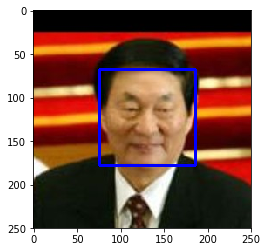

In [17]:
#提取训练好的人脸检测模型
face_cascade=cv2.CascadeClassifier('C:/Users/wlwy/Documents/four_task/tensorflow_vgg16/haarcascade_frontalface_alt.xml')
#加载色彩BGR
img=cv2.imread(human_files[3])#照片250*250*3
#中文路径无法跑通 读取不到图片
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#图像中找脸
faces=face_cascade.detectMultiScale(gray)
print(len(faces),faces)#是一个N*4的数组，N为检测到的脸数目，4个元素为左上角的点坐标，后两个为xy方向的延伸长度
for(x,y,w,h)in faces:
    #画框
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

#将BGR转为RGB
cv_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(cv_rgb)
plt.show()

In [18]:
test=cv2.imread(r'C:\Users\wlwy\Desktop\test.jpg')
test_gray=cv2.cvtColor(test,cv2.COLOR_RGB2GRAY)
test_faces=face_cascade.detectMultiScale(test_gray)
print(len(test_faces),test_faces)

17 [[385 104  32  32]
 [353  16  32  32]
 [314 111  34  34]
 [294 191  45  45]
 [420 188  52  52]
 [503 352  47  47]
 [295 360  62  62]
 [174 349  62  62]
 [229 349  71  71]
 [  9 138  49  49]
 [588 140  49  49]
 [126 253  51  51]
 [179 166  49  49]
 [224 168  47  47]
 [444 256  48  48]
 [224  72  42  42]
 [520 179  53  53]]


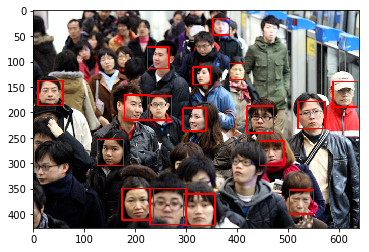

In [19]:
for(x,y,w,h)in test_faces:
    #画框
    cv2.rectangle(test,(x,y),(x+w,y+h),(0,0,255),2)

test_rgb=cv2.cvtColor(test,cv2.COLOR_BGR2RGB)
plt.imshow(test_rgb)
plt.show()

# 人脸识别器

In [20]:
def face_detector(img_path):
    img=cv2.imread(img_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray)
    return len(faces)>0

# 评估人脸检测模型

human_files 的前100张图像中，能够检测到人脸的图像占比多少？
dog_files 的前100张图像中，能够检测到人脸的图像占比多少？

In [21]:
human_files_short=human_files[:100]
dog_files_short=train_files[:100]
num_human=0
num_dog=0
error_human_pic=[]
error_dog_pic=[]
for i in range(len(human_files_short)):
    num_human=num_human+face_detector(human_files_short[i])
    if face_detector(human_files_short[i])==0:#没有检测出人脸
        error_human_pic.append(human_files_short[i])#加入检测错误的列表
num_human_per=num_human/len(human_files_short)
print('100张人脸照片检测出人脸比例：',num_human_per)

for i in range(len(dog_files_short)):
    num_dog=num_dog+face_detector(dog_files_short[i])
    if face_detector(dog_files_short[i])==1:#检测出人脸
        error_dog_pic.append(dog_files_short[i])#加入检测错误的列表
num_dog_per=num_dog/len(dog_files_short)

print('100张狗脸照片检测出人脸比例：',num_dog_per)

100张人脸照片检测出人脸比例： 0.99
100张狗脸照片检测出人脸比例： 0.12


# 评估的另一种写法 只是不能加入图片了

In [22]:
num_human_per=np.mean([face_detector(f) for f in human_files_short])#求取均值 对[0,1,1,1........1]求取均值 就是比例
print(num_human_per)
num_human_per2=np.mean([face_detector(f) for f in dog_files_short])
print(num_human_per2)

0.99
0.12


In [23]:
[face_detector(f) for f in human_files_short]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

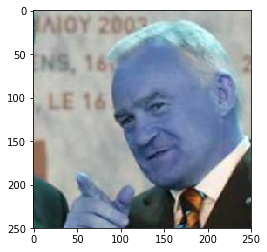

In [24]:
for pic in error_human_pic:
    img=cv2.imread(pic)
    plt.imshow(img)
    plt.show()

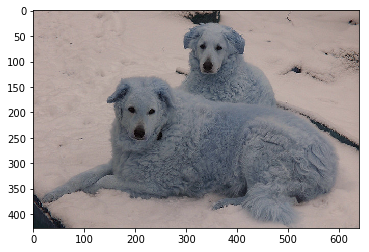

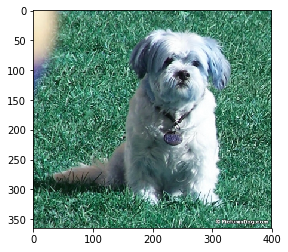

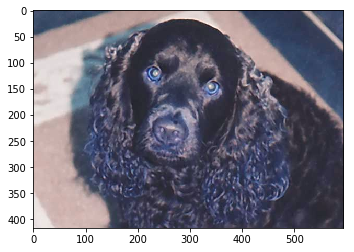

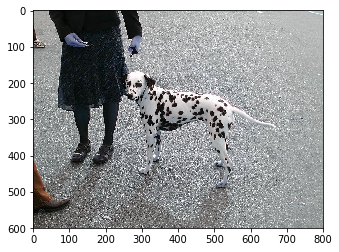

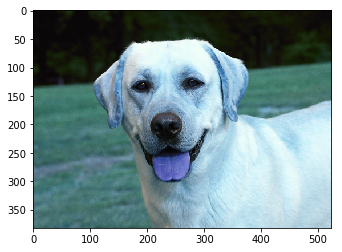

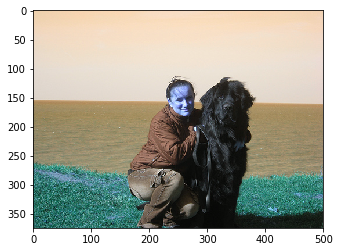

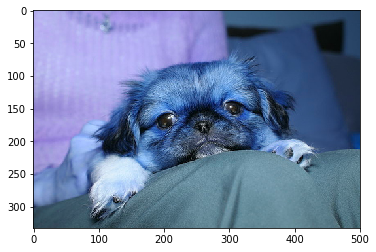

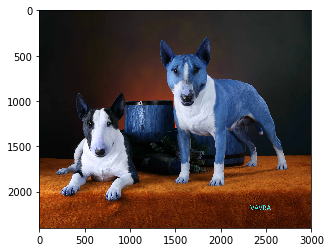

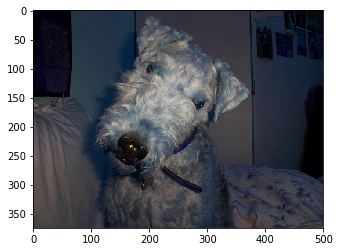

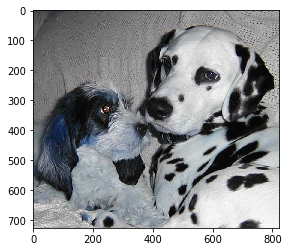

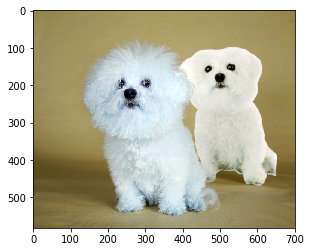

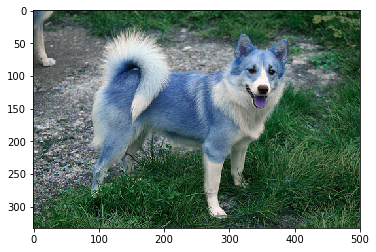

In [25]:
for pic in error_dog_pic:#检测成人脸
    img=cv2.imread(pic)
    plt.imshow(img)
    plt.show()

### 使用预训练的 ResNet-50 模型去检测图像中的狗

In [51]:
#下载ResNet-50
from keras.applications.resnet50 import ResNet50
# 定义ResNet50模型
ResNet50_model = ResNet50(weights='imagenet')#ResNet50是一个通过堆积残差快来实现深度增加不会导致精度下降的深度模型

# 在使用 TensorFlow 作为后端的时候，在 Keras 中，CNN 的输入是一个4维数组（也被称作4维张量），它的各维度尺寸为 (nb_samples, rows, columns, channels)。
其中 nb_samples 表示图像（或者样本）的总数，rows, columns, 和 channels 分别表示图像的行数、列数和通道数。
下方的 path_to_tensor 函数实现如下将彩色图像的字符串型的文件路径作为输入，
返回一个4维张量，作为 Keras CNN 输入。因为我们的输入图像是彩色图像，因此它们具有三个通道（ channels 为 3）。
该函数首先读取一张图像，然后将其缩放为 224×224 的图像。
随后，该图像被调整为具有4个维度的张量。
对于任一输入图像，最后返回的张量的维度是：(1, 224, 224, 3)。
paths_to_tensor 函数将图像路径的字符串组成的 numpy 数组作为输入，并返回一个4维张量，
各维度尺寸为 (nb_samples, 224, 224, 3)。 
在这里，nb_samples是提供的图像路径的数据中的样本数量或图像数量。
你也可以将 nb_samples 理解为数据集中3维张量的个数（每个3维张量表示一个不同的图像。

In [52]:
from keras.preprocessing import image
from tqdm import tqdm#进度条
import numpy as np

def path_to_tensor(img_path):#传进一个图片地址，生成一个四维数组
    #用PIL加载RGB图像为PIL.Image.Image类型
    img=image.load_img(img_path,target_size=(224,224))
    #将PIL.Image.Image类型转换为格式为(224,224,3)的三维张量
    #将图片转成numpy array
    x=image.img_to_array(img)
    #扩展维度,因为preprocess_input需要4D的格式
    #将三维张量转换为（(1,224,224,3)的四维张量并返回
    return np.expand_dims(x,axis=0)#在前面增加一维

def paths_to_tensor(img_paths):#传入多个图片地址，生成四维数组
    list_of_tensors=[path_to_tensor(img_path)for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)#垂直（按照行顺序）的把数组给堆叠起来。

In [54]:
print(np.shape(path_to_tensor(human_files[0])))
print(np.shape(paths_to_tensor(human_files[:10])))

(1, 224, 224, 3)




  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 435.95it/s]

(10, 224, 224, 3)


1. 首先，这些图像的通道顺序为 RGB，我们需要重排他们的通道顺序为 BGR。
2. 其次，预训练模型的输入都进行了额外的归一化过程。因此我们在这里也要对这些张量进行归一化，即对所有图像所有像素都减去像素均值 `[103.939, 116.779, 123.68]`（以 RGB 模式表示，根据所有的 ImageNet 图像算出）。导入的 `preprocess_input` 函数实现了这些功能
3. `predict` 方法来实现，它返回一个向量，向量的第 i 个元素表示该图像属于第 i 个 ImageNet 类别的概率。这通过如下的 `ResNet50_predict_labels` 函数实现
4. 通过对预测出的向量取用 argmax 函数（找到有最大概率值的下标序号），我们可以得到一个整数，即模型预测到的物体的类别。进而根据这个 清单，我们能够知道这具体是哪个品种的狗狗。

In [55]:
from keras.applications.resnet50 import preprocess_input,decode_predictions
def ResNet50_predict_labels(img_path):
    #返回img_path路径的图像预测向量
    img=preprocess_input(path_to_tensor(img_path))#经过pre处理的图片，img也是（1，224，224，3），但是经过了归一化处理和重排
    out=ResNet50_model.predict(img)#out为1*1000的概率分布组成的数组
    return np.argmax(out)#取概率最大化的下标

In [56]:
img=preprocess_input(path_to_tensor(human_files[0]))
out=ResNet50_model.predict(img)
a=np.shape(out)
print(a)
print(np.argmax(out))
out

(1, 1000)
0


array([[2.05285877e-01, 2.80986405e-05, 1.81373034e-04, 4.94059714e-05,
        2.26866076e-04, 5.10781792e-05, 9.78940443e-06, 1.61954857e-04,
        2.33933461e-05, 1.97128174e-05, 1.86554971e-04, 1.39967074e-06,
        1.39798667e-05, 4.88598334e-06, 3.65627711e-05, 7.21451033e-06,
        2.28062095e-06, 1.37680706e-06, 1.36650965e-06, 7.59206432e-06,
        4.89933082e-05, 2.51504447e-04, 1.08640797e-05, 6.30574004e-06,
        5.55837069e-05, 2.65590461e-05, 2.31356498e-05, 9.14996417e-06,
        6.80078869e-04, 4.40551157e-05, 2.01499643e-05, 4.56699809e-06,
        1.09639426e-04, 8.35432671e-04, 3.34376446e-03, 2.78530770e-05,
        3.10766685e-04, 8.04624233e-06, 9.20481034e-05, 1.22737358e-04,
        5.71084411e-06, 6.15198078e-05, 1.06444440e-05, 1.46497056e-04,
        7.92137216e-05, 1.04422514e-04, 3.85819294e-06, 1.13719589e-05,
        2.33001665e-05, 2.39309913e-04, 4.78668022e-04, 3.93028931e-05,
        1.81948039e-04, 1.42215998e-04, 1.26831670e-04, 6.508915

In [57]:
def dog_detector(img_path):#狗类别对应的序号为151-268
    prediction=ResNet50_predict_labels(img_path)
    return ((prediction<=268)&(prediction>=151))

# 评估狗狗检测模型

In [32]:
human_files_short=human_files[:100]
dog_files_short=train_files[:100]
num_human2=0
num_dog2=0
error_human_pic2=[]
error_dog_pic2=[]

for i in range(len(human_files_short)):
    num_human2=num_human2+dog_detector(human_files_short[i])
    if dog_detector(human_files_short[i])==1:
        error_huamn_pic2.append(human_file_short[i])
num_human_per2=num_human2/len(human_files_short)
print('100张人脸中检测出狗脸的比例：',num_human_per2)

for i in range(len(dog_files_short)):
    num_dog2=num_dog2+dog_detector(dog_files_short[i])
    if dog_detector(dog_files_short[i])==0:
        error_dog_pic2.append(dog_files_short[i])
num_dog_per2=num_dog2/len(dog_files_short)

print('100张狗脸检测出狗脸的比例：',num_dog_per2)

100张人脸中检测出狗脸的比例： 0.0
100张狗脸检测出狗脸的比例： 1.0


In [33]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
num_human2=0
num_dog2=0
error_human_pic2=[]
error_dog_pic2=[]
num_human_per2=np.mean([dog_detector(f) for f in human_files_short])
num_dog_per2=np.mean([dog_detector(f) for f in dog_files_short])
print(num_human_per2,num_dog_per2)

0.0 1.0


In [34]:
for pic in error_human_pic2:#人脸中被检测出狗脸的照片 米有
    img = cv2.imread(pic)
    plt.imshow(img)
    plt.show()